# Explore different types of Data Visualization

#Import libraries

In [1]:
# Geopandas is for maps
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 53.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 65.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 140.6 MB/s eta 0:00:00


In [2]:
# Numpy & pandas
import numpy as np
import pandas as pd
import missingno as mn
from random import sample
from numpy.random import uniform
from math import isnan

# Matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style

# Seaborn
import seaborn as sns
import matplotlib.cm as cm
%matplotlib inline
from matplotlib import rcParams

# Plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.tools import FigureFactory as FF
from plotly import tools
from plotly.colors import n_colors
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

from IPython.display import display, HTML
init_notebook_mode(connected=True)

#Plotly in Collab
def configure_plotly_collab():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# Import file

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Semana6_DataScience_Python/Datasets/Country-data.xls')
df.shape

(167, 10)

In [5]:
df.columns = map(str.upper,df.columns)
df.head(10)

,COUNTRY,CHILD_MORT,EXPORTS,HEALTH,IMPORTS,INCOME,INFLATION,LIFE_EXPEC,TOTAL_FER,GDPP
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   COUNTRY     167 non-null    object 
 1   CHILD_MORT  167 non-null    float64
 2   EXPORTS     167 non-null    float64
 3   HEALTH      167 non-null    float64
 4   IMPORTS     167 non-null    float64
 5   INCOME      167 non-null    int64  
 6   INFLATION   167 non-null    float64
 7   LIFE_EXPEC  167 non-null    float64
 8   TOTAL_FER   167 non-null    float64
 9   GDPP        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
df.isna().sum()

COUNTRY       0
CHILD_MORT    0
EXPORTS       0
HEALTH        0
IMPORTS       0
INCOME        0
INFLATION     0
LIFE_EXPEC    0
TOTAL_FER     0
GDPP          0
dtype: int64

In [8]:
def dist_report(df_, percentiles=[0.25,0.5,0.75]):
    def dtype_null(df_x):
        a = pd.DataFrame(df_x.dtypes, columns=['dtype'])
        b = pd.DataFrame(df_x.isna().sum(), columns=['nulls'])
        b['%nulls'] = round(100*b['nulls']/ df_x.shape[0],2)
        return a.join(b)

    # Numeric
    num_df = df_.select_dtypes(include=['number'])
    num_report = num_df.describe(percentiles=percentiles).transpose()
    num_report_all = dtype_null(num_df).join(num_report).sort_values('dtype')

    # Categoric
    cat_df = df_.select_dtypes(exclude=['number'])
    cat_report = cat_df.describe().transpose()
    cat_report_all = dtype_null(cat_df).join(cat_report).sort_values('dtype')

    return num_report_all, cat_report_all

In [9]:
num_report, cat_report = dist_report(df)

In [10]:
num_report

,dtype,nulls,%nulls,count,mean,std,min,25%,50%,75%,max
INCOME,int64,0,0.0,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
GDPP,int64,0,0.0,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00
CHILD_MORT,float64,0,0.0,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
EXPORTS,float64,0,0.0,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
HEALTH,float64,0,0.0,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
IMPORTS,float64,0,0.0,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
INFLATION,float64,0,0.0,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
LIFE_EXPEC,float64,0,0.0,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
TOTAL_FER,float64,0,0.0,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49


In [11]:
cat_report

,dtype,nulls,%nulls,count,unique,top,freq
COUNTRY,object,0,0.0,167,167,Afghanistan,1


Let's add another source of information to have the coordinates.

In [12]:
import geopandas as gpd

# Download the shapefile
gpd.datasets.available
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Print the first few rows to see what the data looks like
print(world.head())

       pop_est      continent                      name iso_a3  gdp_md_est  \
0     889953.0        Oceania                      Fiji    FJI        5496   
1   58005463.0         Africa                  Tanzania    TZA       63177   
2     603253.0         Africa                 W. Sahara    ESH         907   
3   37589262.0  North America                    Canada    CAN     1736425   
4  328239523.0  North America  United States of America    USA    21433226   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  


In [13]:
map_test_df = pd.merge(df, world, how='left', left_on='COUNTRY', right_on='name')
print(map_test_df[map_test_df['name'].isnull()].shape)
map_test_df[map_test_df['name'].isnull()]
# 30 countries don't match

(30, 16)


,COUNTRY,CHILD_MORT,EXPORTS,HEALTH,IMPORTS,INCOME,INFLATION,LIFE_EXPEC,TOTAL_FER,GDPP,pop_est,continent,name,iso_a3,gdp_md_est,geometry
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,NaN,NaN,NaN,NaN,NaN,None
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,NaN,NaN,NaN,NaN,NaN,None
13,Barbados,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16000,NaN,NaN,NaN,NaN,NaN,None
20,Bosnia and Herzegovina,6.9,29.7,11.10,51.3,9720,1.400,76.8,1.31,4610,NaN,NaN,NaN,NaN,NaN,None
30,Cape Verde,26.5,32.7,4.09,61.8,5830,0.505,72.5,2.67,3310,NaN,NaN,NaN,NaN,NaN,None
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.010,47.5,5.21,446,NaN,NaN,NaN,NaN,NaN,None
36,Comoros,88.2,16.5,4.51,51.7,1410,3.870,65.9,4.75,769,NaN,NaN,NaN,NaN,NaN,None
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.800,57.5,6.54,334,NaN,NaN,NaN,NaN,NaN,None
38,"Congo, Rep.",63.9,85.1,2.46,54.7,5190,20.700,60.4,4.95,2740,NaN,NaN,NaN,NaN,NaN,None
40,Cote d'Ivoire,111.0,50.6,5.30,43.3,2690,5.390,56.3,5.27,1220,NaN,NaN,NaN,NaN,NaN,None


In [14]:
world[world['name'].str.contains('ing')]
# What remains is to give them the same name as in our dataset world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
143,66834405.0,Europe,United Kingdom,GBR,2829108,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54..."


In [15]:
# Correct some names
correct_names = {
    'United States of America':'United States',
    "Côte d'Ivoire": "Cote d'Ivoire",
    'Central African Republic':'Central African Rep.',
    'Bosnia and Herz.':'Bosnia and Herzegovina'
}

world['name'] = world['name'].replace(correct_names)

In [16]:
df = pd.merge(df, world, how='left', left_on='COUNTRY', right_on='name')

In [17]:
df.head()

,COUNTRY,CHILD_MORT,EXPORTS,HEALTH,IMPORTS,INCOME,INFLATION,LIFE_EXPEC,TOTAL_FER,GDPP,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,38041754.0,Asia,Afghanistan,AFG,19291.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2854191.0,Europe,Albania,ALB,15279.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,43053054.0,Africa,Algeria,DZA,171091.0,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948..."
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,31825295.0,Africa,Angola,AGO,88815.0,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,NaN,NaN,NaN,NaN,NaN,None


# Visualization

## Bar plot

In [18]:
#Get top 10 countries with less GDP
df_gdp = df[['COUNTRY','GDPP']].sort_values(by='GDPP',ascending=True).head(10)

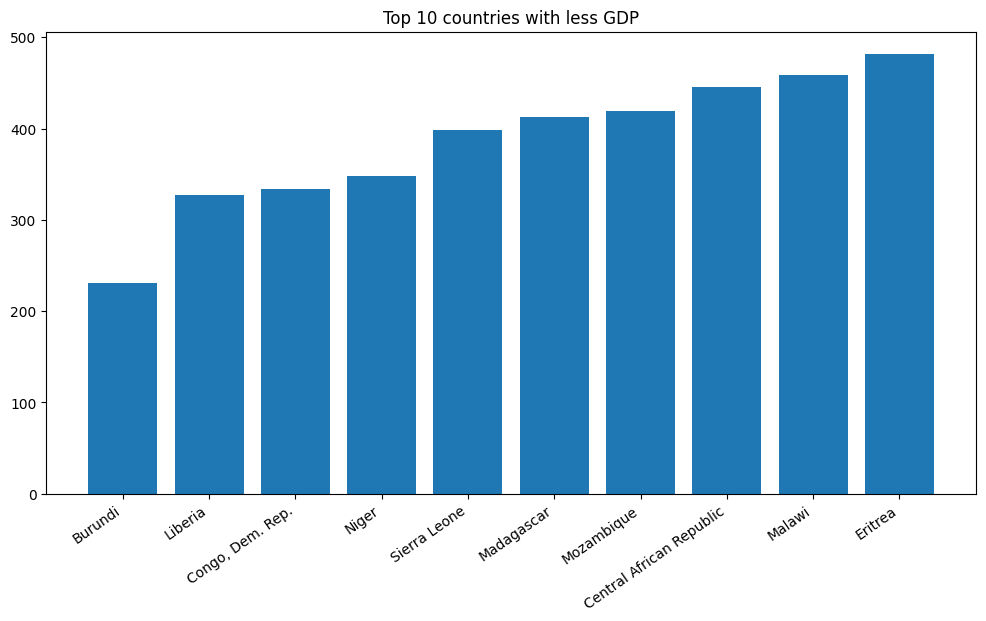

In [19]:
# MATPLOTLIB BAR
plt.figure(figsize=[12,6])
plt.bar('COUNTRY', 'GDPP', data=df_gdp)
plt.title('Top 10 countries with less GDP')
plt.xticks(rotation=35, ha='right') # Rotate names to avoid overlapping
plt.show()

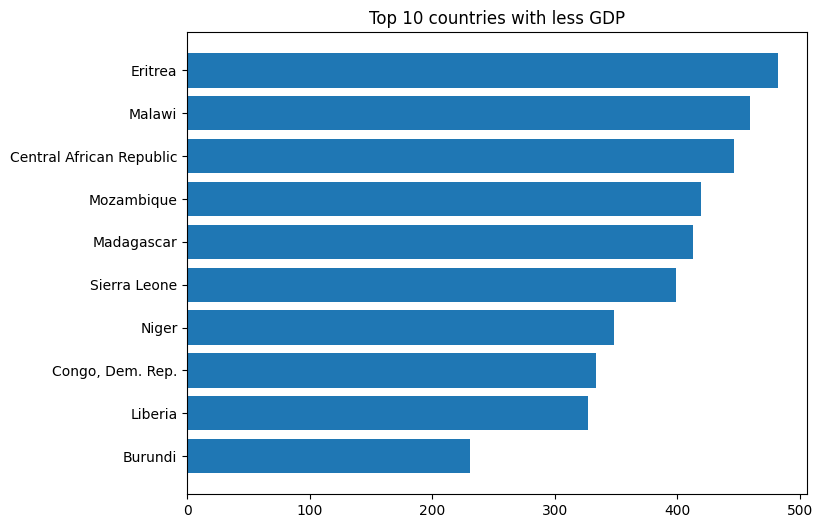

In [21]:
# MATPLOTLIB BAR HORIZONTAL
plt.figure(figsize=[8,6])
plt.barh('COUNTRY', 'GDPP', data=df_gdp)
plt.title('Top 10 countries with less GDP')
plt.show()

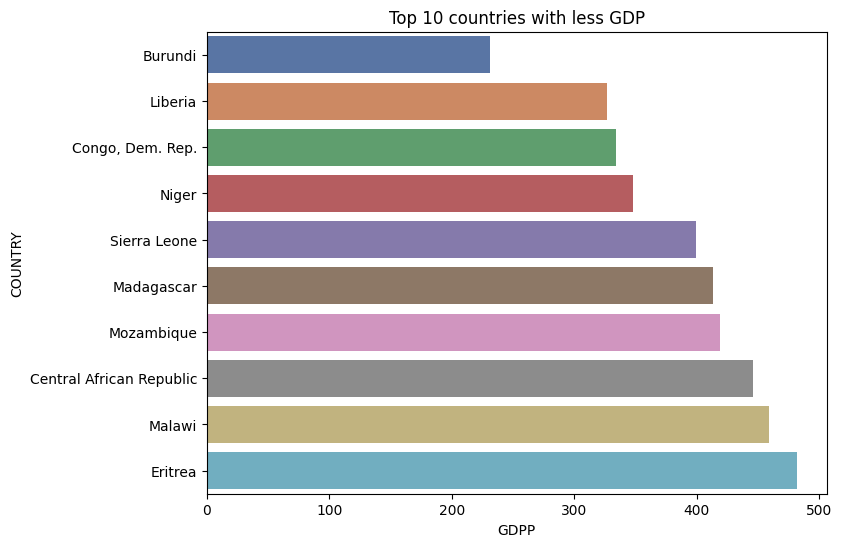

In [22]:
# SEABORN BARPLOT
rcParams['figure.figsize'] = 8,6
fig = sns.barplot(x='GDPP', y='COUNTRY', data=df_gdp, palette='deep')
fig.set_title("Top 10 countries with less GDP")
plt.show()

In [23]:
#Plotly
configure_plotly_collab()
fig = px.bar(df_gdp, x='GDPP', y='COUNTRY', width=800, height=600, color='GDPP', title='Top 10 countries with less GDP')
fig.show()

## Distribution plot

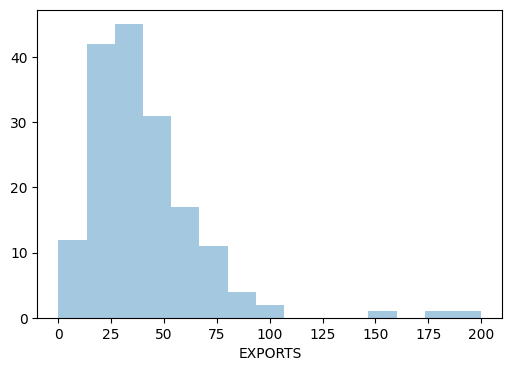

In [24]:
fig = plt.figure(figsize=(6,4))
sns.distplot(df['EXPORTS'], bins=15, kde=False) #kde allows us to choose between the histogram and the density plot, if kde = False the density plot does not appear
plt.show()

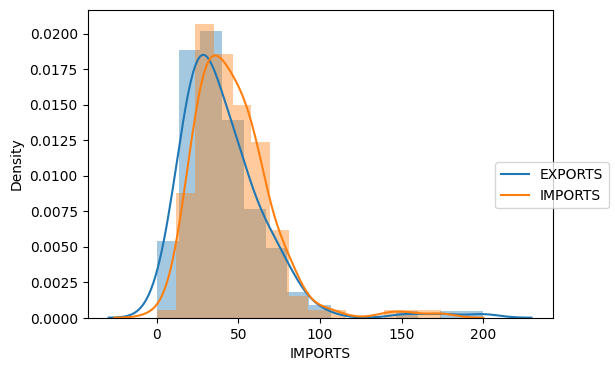

In [25]:
#Seaborn
fig = plt.figure(figsize=(6,4))
sns.distplot(df['EXPORTS'], bins=15)
sns.distplot(df['IMPORTS'], bins=15)
fig.legend(labels=['EXPORTS', 'IMPORTS'], loc='center right')  # loc changes the location of the tag
plt.show()

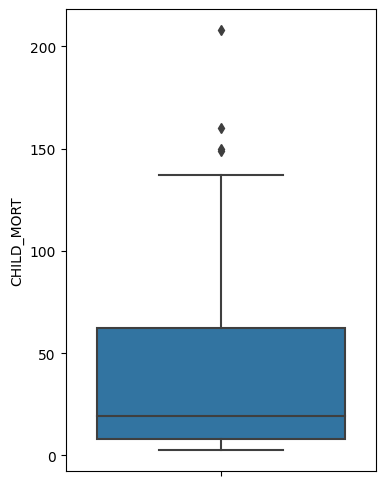

In [26]:
rcParams['figure.figsize'] = 4,6
sns.boxplot(y=df['CHILD_MORT'])  #y or x define how the boxplot will be plotted
plt.show()

In [27]:
df

,COUNTRY,CHILD_MORT,EXPORTS,HEALTH,IMPORTS,INCOME,INFLATION,LIFE_EXPEC,TOTAL_FER,GDPP,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,38041754.0,Asia,Afghanistan,AFG,19291.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2854191.0,Europe,Albania,ALB,15279.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,43053054.0,Africa,Algeria,DZA,171091.0,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948..."
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,31825295.0,Africa,Angola,AGO,88815.0,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,NaN,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,299882.0,Oceania,Vanuatu,VUT,934.0,"MULTIPOLYGON (((167.21680 -15.89185, 167.84488..."
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,28515829.0,South America,Venezuela,VEN,482359.0,"POLYGON ((-60.73357 5.20028, -60.60118 4.91810..."
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,96462106.0,Asia,Vietnam,VNM,261921.0,"POLYGON ((104.33433 10.48654, 105.19991 10.889..."
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,29161922.0,Asia,Yemen,YEM,22581.0,"POLYGON ((52.00001 19.00000, 52.78218 17.34974..."


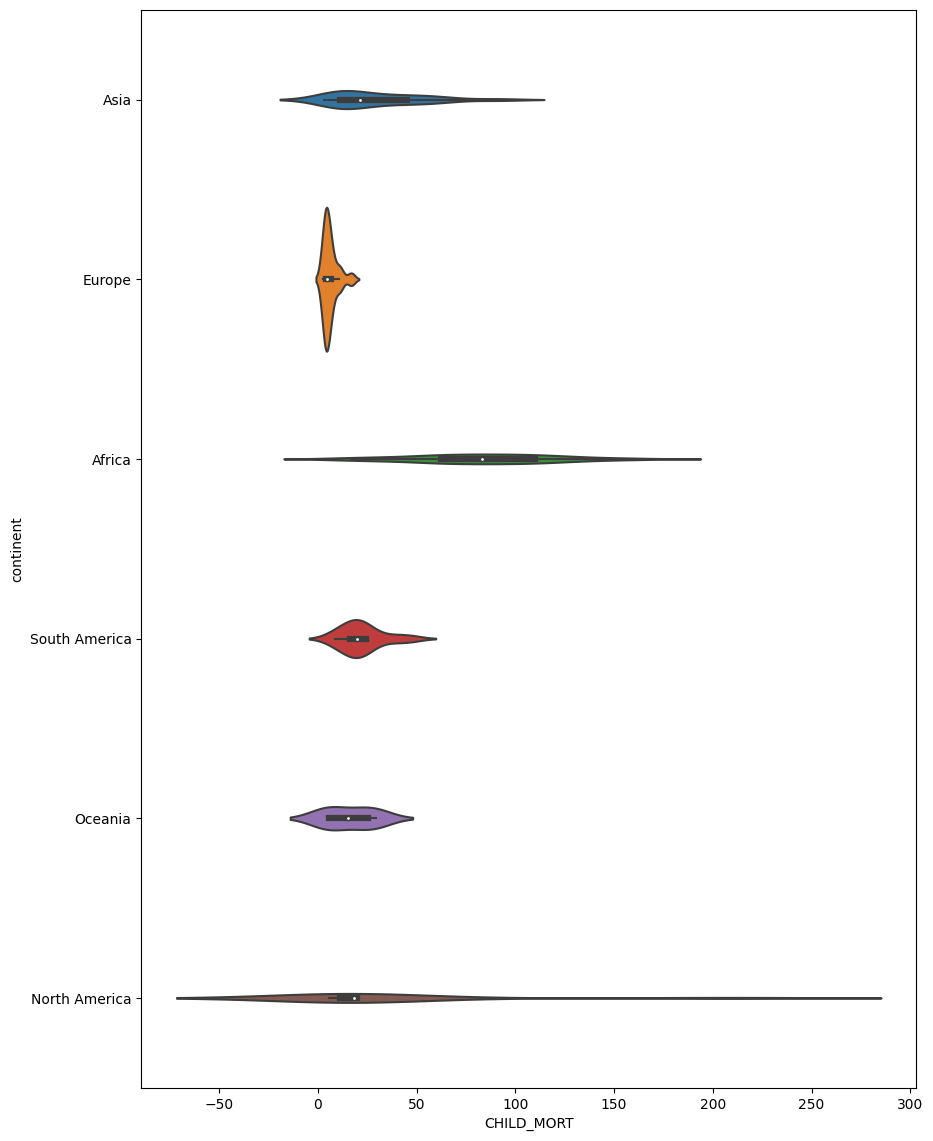

In [28]:
rcParams['figure.figsize'] = 10,14
sns.violinplot(x=df['CHILD_MORT'], y=df['continent'])
plt.show()

## Evolution & Correlation plots

### Line plot

In [29]:
#LIFE EXPECTANCY vs GDP
df_life = df[['COUNTRY','GDPP','LIFE_EXPEC']].sort_values('GDPP')

In [30]:
configure_plotly_collab()
px.line(df_life, 'GDPP', 'LIFE_EXPEC', hover_name='COUNTRY') # hover_name is to indicate what we want to see in each data, in this case country

## Scatter plot

In [31]:
configure_plotly_collab()
px.scatter(df_life, 'GDPP', 'LIFE_EXPEC', hover_name='COUNTRY')

In [32]:
#3 dimensions
#LIFE EXPECTANCY vs GDP vs HEALTH
configure_plotly_collab()
df_3D = df[['COUNTRY','GDPP','LIFE_EXPEC','HEALTH']]
px.scatter(df_3D, x='GDPP', y='LIFE_EXPEC', hover_name='COUNTRY', size='HEALTH', color='GDPP')

In [33]:
configure_plotly_collab()

fig = px.scatter(df_3D, x='GDPP', y='LIFE_EXPEC', hover_name='COUNTRY', size='HEALTH', color='GDPP', color_continuous_scale='Viridis')
# color_continuous_scale defines the color scale
fig.update_xaxes(title='GDP per Capita []', title_font=dict(size=20))
fig.update_yaxes(title='Life Expectancy [years]', title_font=dict(size=20))
# title_font defines the size of the title
fig.update_layout(title='GDP and Life Expectancy', width=1200, height=600, template='ggplot2')
# template change title text place and axes
fig.show()

In [34]:
configure_plotly_collab()
df_fed = df.groupby('COUNTRY')['LIFE_EXPEC', 'HEALTH', 'GDPP'].sum().reset_index()
fig = px.scatter_3d(df_fed, x='GDPP', y='LIFE_EXPEC', z='HEALTH', opacity=0.6, hover_data=['COUNTRY'])
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

## Pie chart

In [35]:
# ¿Which countries represent most of the world population?
configure_plotly_collab()
df_pop= df[['COUNTRY','pop_est']].sort_values('pop_est',ascending=False).head(10)
# only the top 10 were chosen therefore the figure is not entirely correct
px.pie(df_pop,'COUNTRY','pop_est')

In [36]:
configure_plotly_collab()
df_pop = df[['COUNTRY','pop_est']].sort_values('pop_est',ascending=False).head(10)
df_pop_new = df[['COUNTRY','pop_est']]
df_pop_new.loc[df_pop_new['COUNTRY'].isin(df_pop['COUNTRY']) == False, 'COUNTRY'] = 'Rest'
# Put the rest of the countries that do not appear in the top 10 as 'Rest'
px.pie(df_pop_new,'COUNTRY','pop_est')

## Heatmap

In [37]:
df.corr()

,CHILD_MORT,EXPORTS,HEALTH,IMPORTS,INCOME,INFLATION,LIFE_EXPEC,TOTAL_FER,GDPP,pop_est,gdp_md_est
CHILD_MORT,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032,0.001089,-0.164524
EXPORTS,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725,-0.161466,-0.138507
HEALTH,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966,-0.090733,0.312859
IMPORTS,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498,-0.225878,-0.222328
INCOME,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571,-0.070619,0.180491
INFLATION,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631,0.067624,-0.085068
LIFE_EXPEC,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089,0.005252,0.189319
TOTAL_FER,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910,-0.073361,-0.182443
GDPP,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000,-0.067500,0.217585
pop_est,0.001089,-0.161466,-0.090733,-0.225878,-0.070619,0.067624,0.005252,-0.073361,-0.067500,1.000000,0.568625


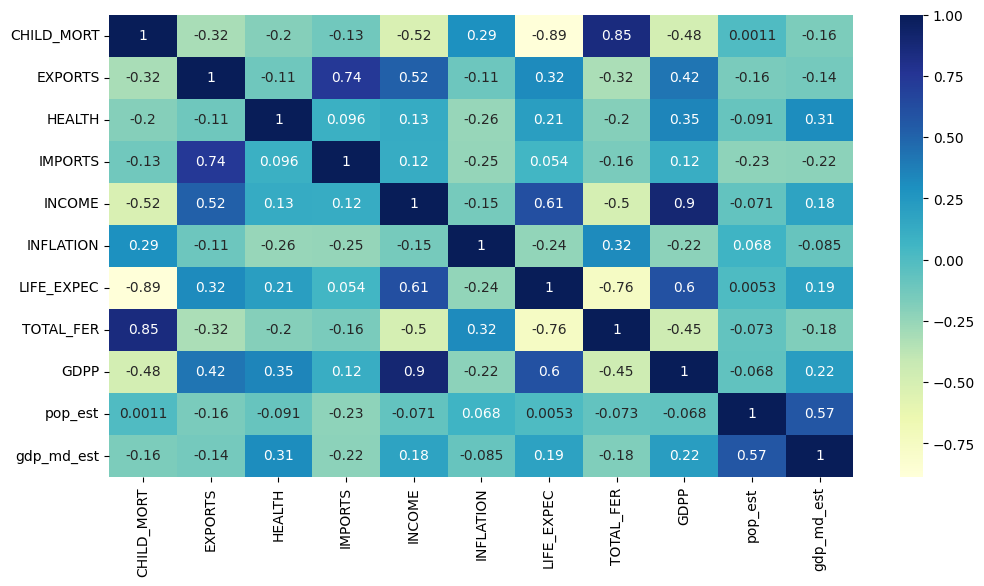

In [38]:
rcParams['figure.figsize'] = 12,6
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

## Choropleth map

In [39]:
df.shape

(167, 16)

In [40]:
# Avoid nulls
map_df = df[df['name'].notnull()]
print(map_df.shape)

(140, 16)


In [41]:
map_df.head()

,COUNTRY,CHILD_MORT,EXPORTS,HEALTH,IMPORTS,INCOME,INFLATION,LIFE_EXPEC,TOTAL_FER,GDPP,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,38041754.0,Asia,Afghanistan,AFG,19291.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2854191.0,Europe,Albania,ALB,15279.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,43053054.0,Africa,Algeria,DZA,171091.0,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948..."
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,31825295.0,Africa,Angola,AGO,88815.0,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,44938712.0,South America,Argentina,ARG,445445.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."


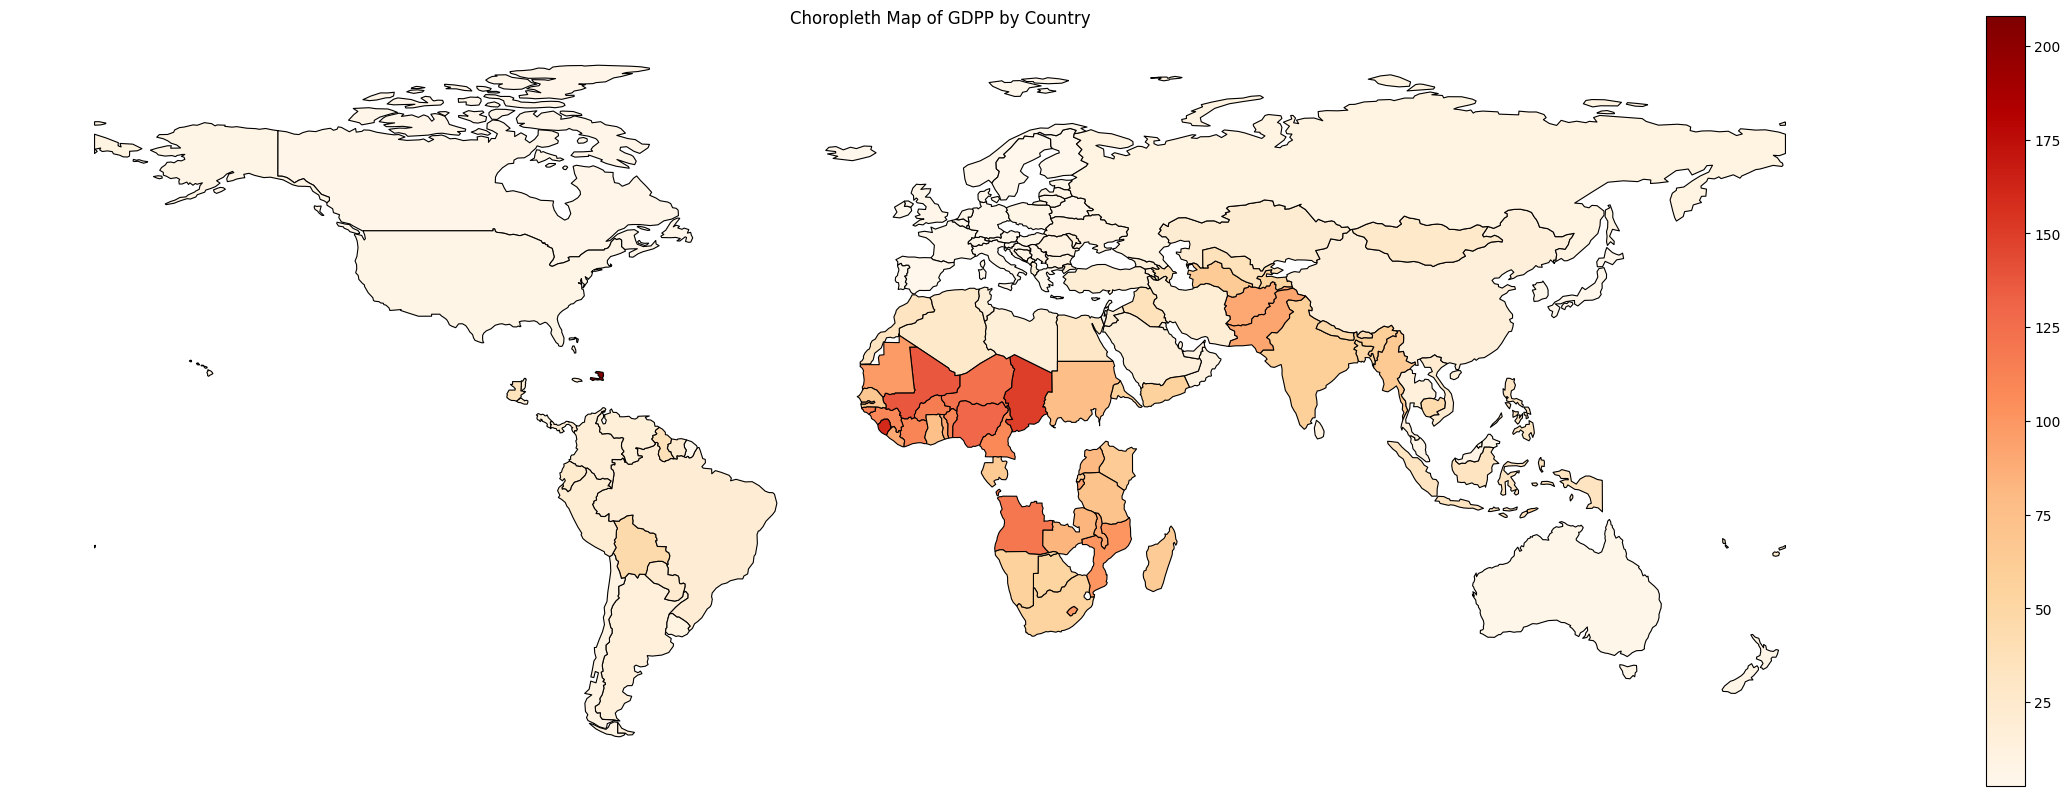

In [42]:
gdf = gpd.GeoDataFrame(map_df, geometry='geometry')

# Create the plot
fig, ax = plt.subplots(figsize=(30,10))

# Plot the choropleth map
gdf.plot(column='CHILD_MORT', cmap='OrRd', linewidth=0.8, edgecolor='black', legend=True, ax=ax)

# Add a title and remove the axis ticks and labels
ax.set_title('Choropleth Map of GDPP by Country')
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')

# Show the plot
plt.show()